In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
df = pd.read_csv('USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


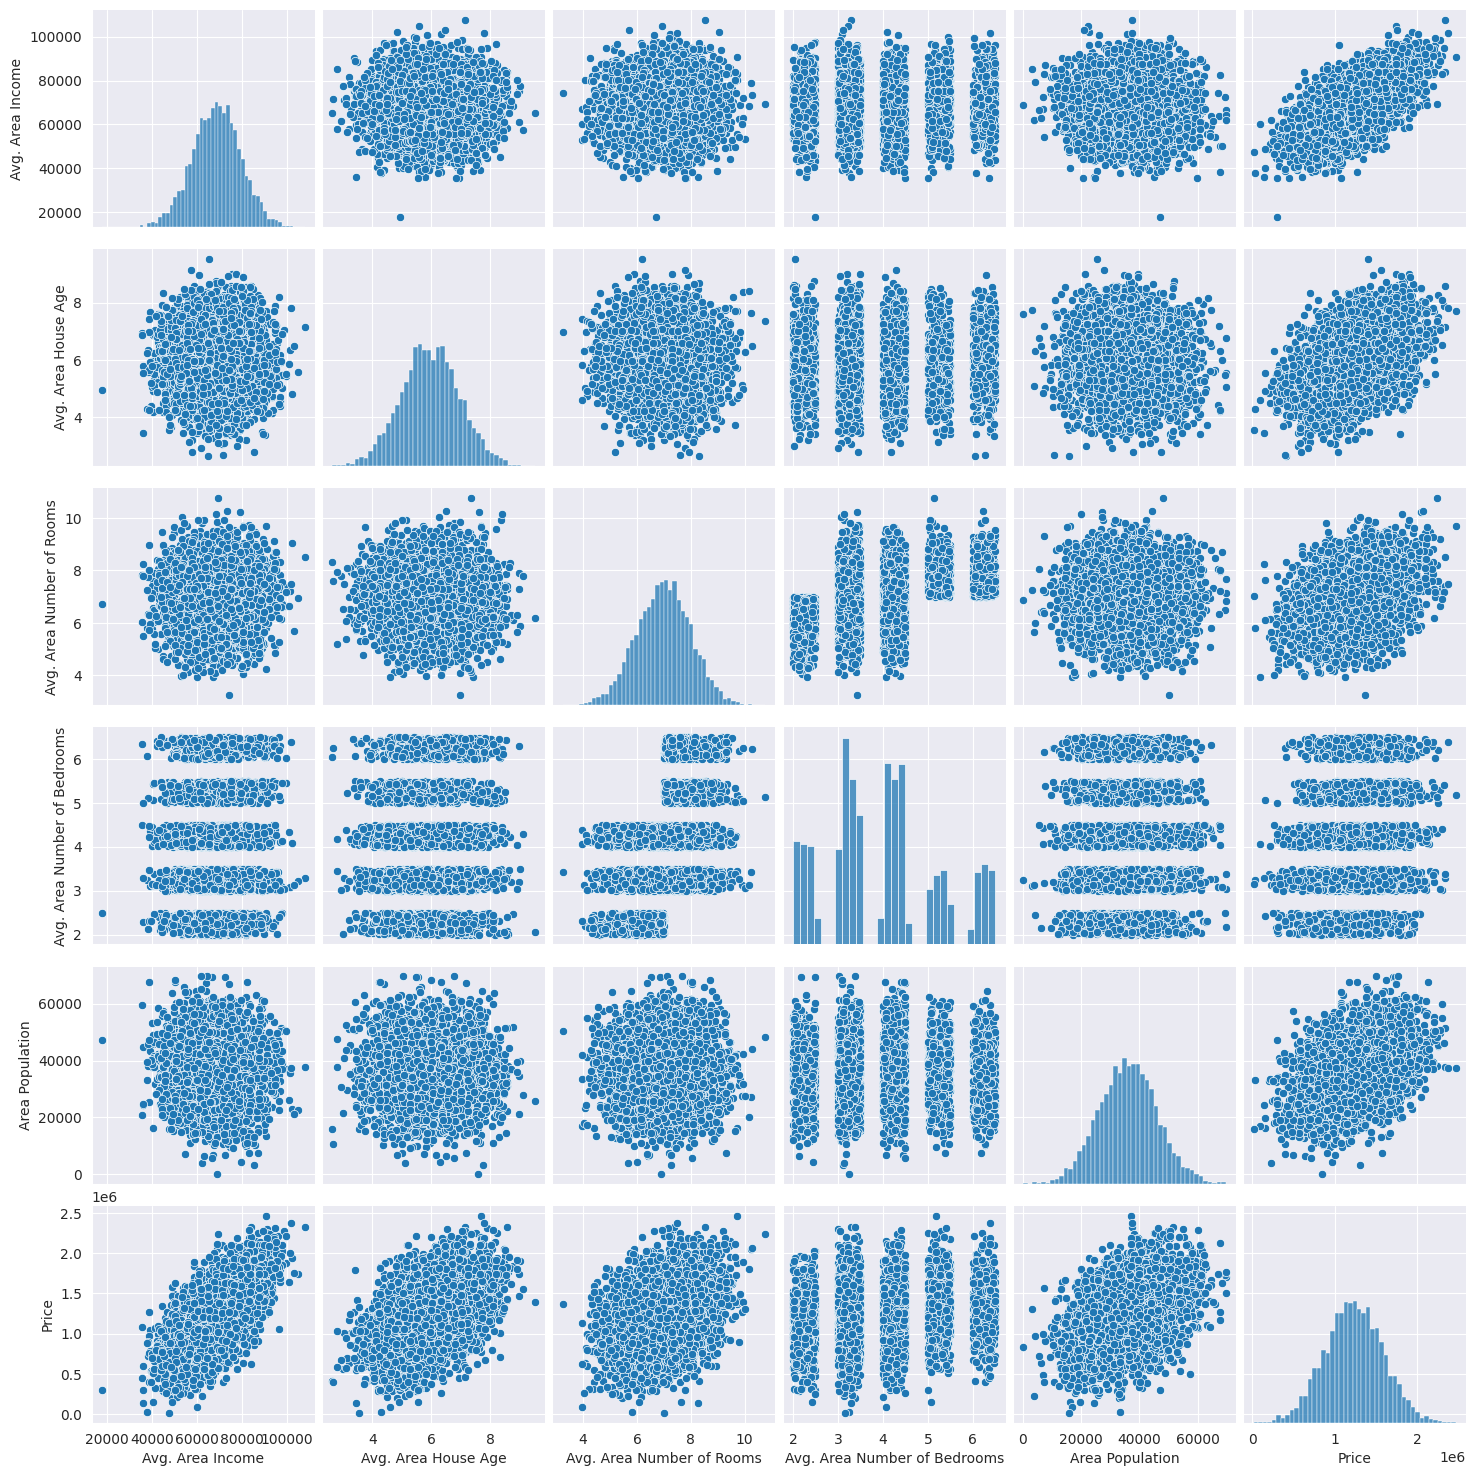

In [6]:
sns.pairplot(df)

<AxesSubplot: xlabel='Price', ylabel='Count'>

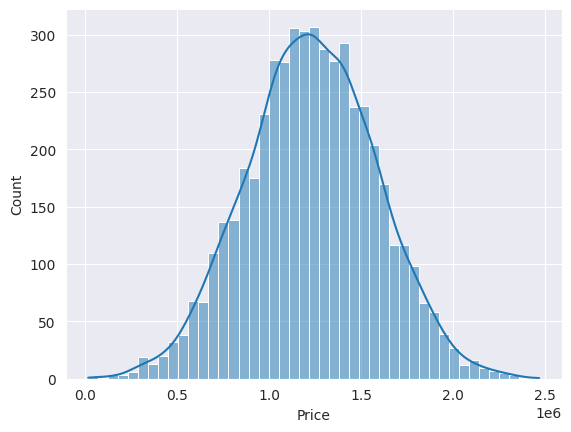

In [8]:
sns.histplot(df['Price'], kde=True)

<AxesSubplot: >

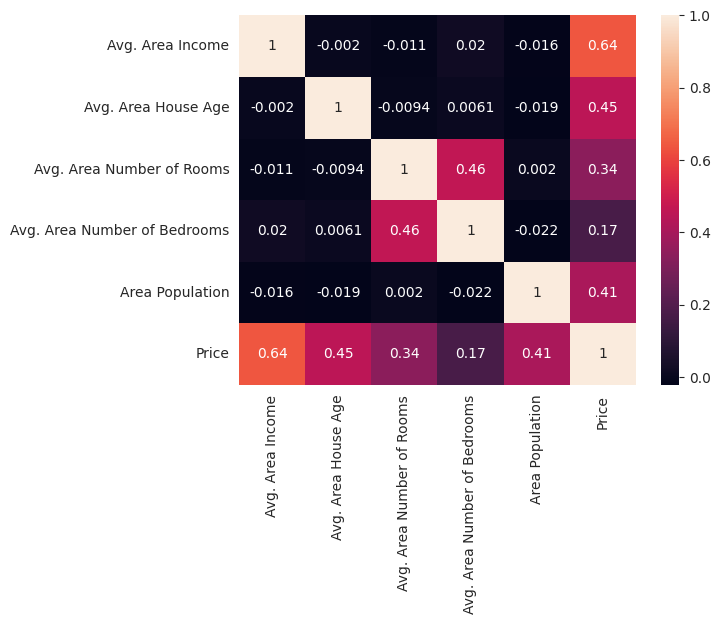

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [27]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [28]:
X = df.drop(columns=['Price', 'Address'])

In [29]:
y = df['Price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [31]:
lm = LinearRegression()

In [32]:
lm.fit(X_train, y_train)

LinearRegression()

In [33]:
print(lm.intercept_)

-2642239.2512348383


In [34]:
lm.coef_

array([2.15704132e+01, 1.66552478e+05, 1.19512534e+05, 2.75895188e+03,
       1.52968610e+01])

In [35]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [37]:
cdf = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coeff'])

In [38]:
cdf

,Coeff
Avg. Area Income,21.570413
Avg. Area House Age,166552.477670
Avg. Area Number of Rooms,119512.534382
Avg. Area Number of Bedrooms,2758.951878
Area Population,15.296861


In [39]:
predictions = lm.predict(X_test)

In [40]:
predictions

array([1311074.59195064, 1239575.75693463, 1243916.25450739, ...,
        840825.86587503, 1050491.02276028,  946720.46738513])

In [41]:
y_test

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
331     9.967712e+05
3100    1.146480e+06
1454    7.769063e+05
342     1.123851e+06
3209    9.870041e+05
Name: Price, Length: 2000, dtype: float64

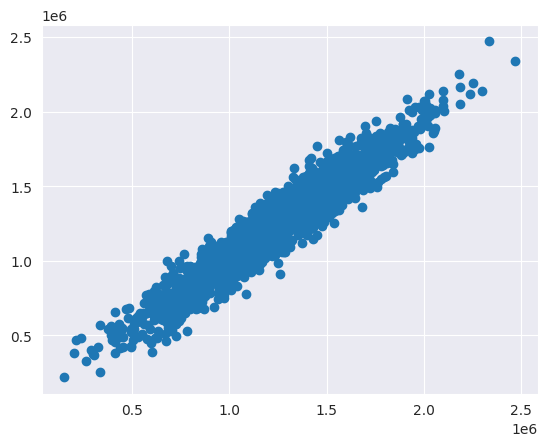

In [42]:
plt.scatter(y_test, predictions)

<AxesSubplot: xlabel='Price', ylabel='Count'>

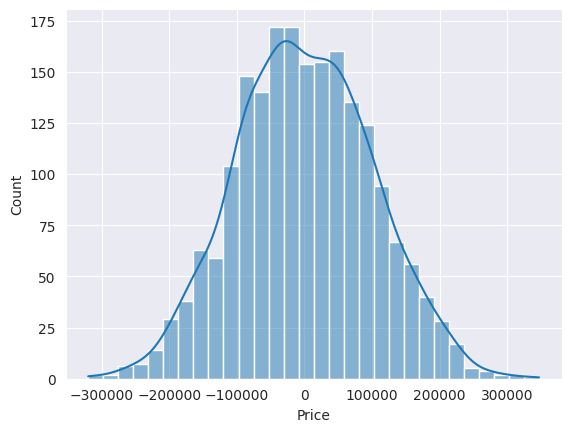

In [43]:
sns.histplot((y_test - predictions), kde=True)

In [45]:
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

In [46]:
mae

81331.22699573744

In [47]:
mse

10119734875.65352

In [48]:
rmse

100596.89297216649